# Double Checking of corrected ISIMIP2b histsoc and rcp26soc (following SSP2) population

This notebook uses the same plots as the [quickcheck_isimip2b_histsoc_rcpsoc_ww.ipynb](./quickcheck_isimip2b_histsoc_rcpsoc_ww.ipynb) script to doublecheck the corrections made in [population_data_correction_for_consistent_spatial_distribution_of_national_population.ipynb](./population_data_correction_for_consistent_spatial_distribution_of_national_population.ipynb)



In [1]:
# import modules
import os
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
%matplotlib inline 


In [2]:
# define coordinates of individual gridcells to plot timeseries of

cell_saudi = [21.25, 49.75] # grid cell lat lon coordinates: Grid cell in Saudi-Arabia
cell_france = [50.75,4.75]
cell_kazachstan = [47.75, 81.25]

cells_toplot = [cell_saudi, cell_france,  cell_kazachstan ]
names_toplot = ['Saudi',      'France',    'Kazachstan']

## 0. Functions

In [3]:
# functions to plot individual grid cells

# wrapper plotting script for plotting individual grid cells 
def plot_cell_series(da, cells_toplot, names_toplot):
    fig, axes = plt.subplots(1,len(cells_toplot), figsize=(7*len(cells_toplot),4))

    for i, ax in enumerate(axes): 
        plot_gridcell_timeseries(ax, da, cells_toplot[i], names_toplot[i])

# plot timeseries of data array for single grid cell 
def plot_gridcell_timeseries(ax, da, cell_coord, name): 
    da.sel({'lat':cell_coord[0],'lon':cell_coord[1]}).plot(ax=ax)
    ax.set_title(name+ ' grid cell')
    #ax.axvline(2000, color='grey')    
    
def plot_globalsum_timeseries(da): 
    fig,ax = plt.subplots()
    da.sum(dim=('lat','lon')).plot()
    ax.set_title('global sum')

In [4]:
# plot transition maps from 1999-2000 and 2000-2001
def plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2005_2006,variable_name): 


    map_proj = ccrs.Robinson(central_longitude=0, globe=None)

    fig, axes = plt.subplots(1,3,figsize=(40,20), subplot_kw={'projection':map_proj})

    axes = axes.flatten()

    ax= axes[0]
    ax.axis('off')
    ax.coastlines(color='lightgray',linewidth=0.5)

    delta_2000_1999.plot(ax=ax, cbar_kwargs={'fraction': 0.02, 'pad': 0.04}, cmap='RdBu', vmin=-30, vmax=30, transform=ccrs.PlateCarree())

    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('');

    ax.set_title('$\Delta$ ' +variable_name+' 2000-1999 (%)', loc='right', fontsize=20);
    ax.set_title('                 a.', loc='left', fontsize=20);


    ax = axes[1]


    ax.axis('off')
    ax.coastlines(color='lightgray',linewidth=0.5)

    delta_2001_2000.plot(ax=ax, cbar_kwargs={'fraction': 0.02, 'pad': 0.04}, cmap='RdBu', vmin=-30, vmax=30, transform=ccrs.PlateCarree())

    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('');

    ax.set_title('$\Delta$ ' +variable_name+' 2001-2000 (%)', loc='right', fontsize=20);
    ax.set_title('                 a.', loc='left', fontsize=20);
    
    
    ax = axes[2]


    ax.axis('off')
    ax.coastlines(color='lightgray',linewidth=0.5)

    delta_2005_2006.plot(ax=ax, cbar_kwargs={'fraction': 0.02, 'pad': 0.04}, cmap='RdBu', vmin=-30, vmax=30, transform=ccrs.PlateCarree())

    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('');

    ax.set_title('$\Delta$ ' +variable_name+' 2005-2006 (%)', loc='right', fontsize=20);
    ax.set_title('                 a.', loc='left', fontsize=20);

## 1. Population (uncorrected)


In [5]:
pop = xr.open_dataset('/scratch/brussel/vo/000/bvo00012/vsc10055/waterscarcity/waterscarcity_isimip/data/intermediate/population_histsoc_rcp26soc_0p5deg_annual_1861-2100.nc4')['pop']


### Spatial year-to-year transitions

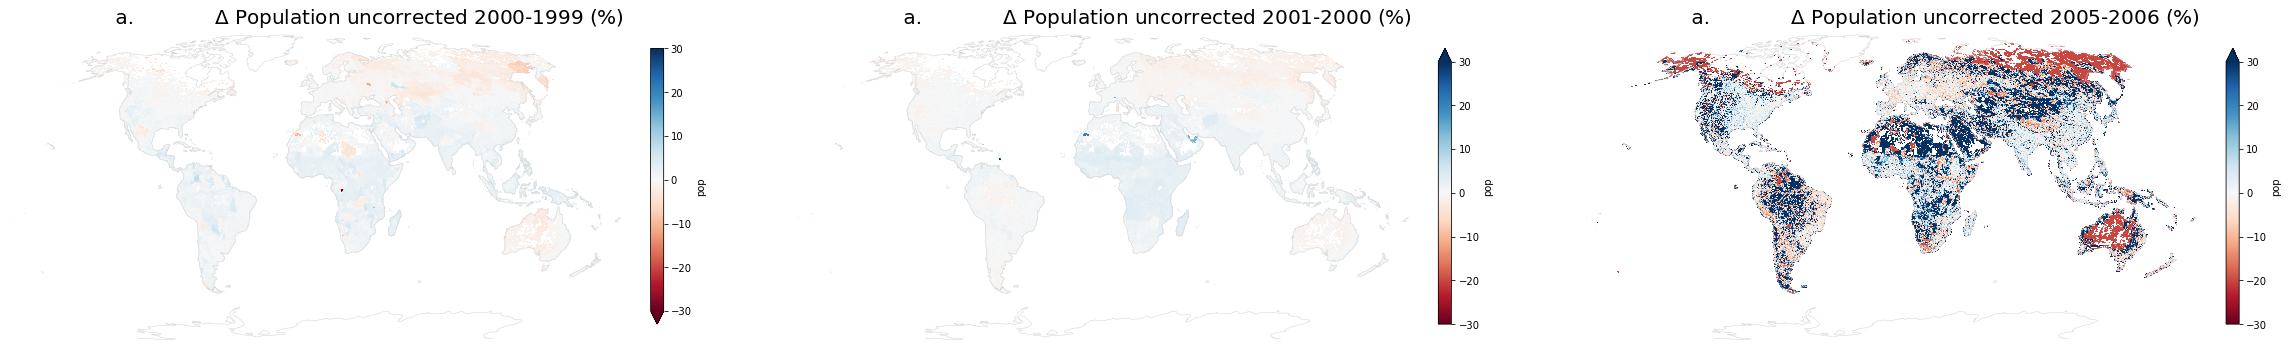

In [51]:
pop_2000 = pop.sel(time="2000-12-31").squeeze()
pop_1999 = pop.sel(time="1999-12-31").squeeze()
pop_2001 = pop.sel(time="2001-12-31").squeeze()
pop_2005 = pop.sel(time="2005-12-31").squeeze()
pop_2006 = pop.sel(time="2006-12-31").squeeze()

delta_2000_1999 = (pop_2000 - pop_1999)/pop_1999 *100
delta_2001_2000 = (pop_2001 - pop_2000)/pop_2000 *100
delta_2006_2005 = (pop_2006 - pop_2005)/pop_2005 *100

variable_name = 'Population uncorrected'

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)

### Plot timeseries for individual grid cells and global mean

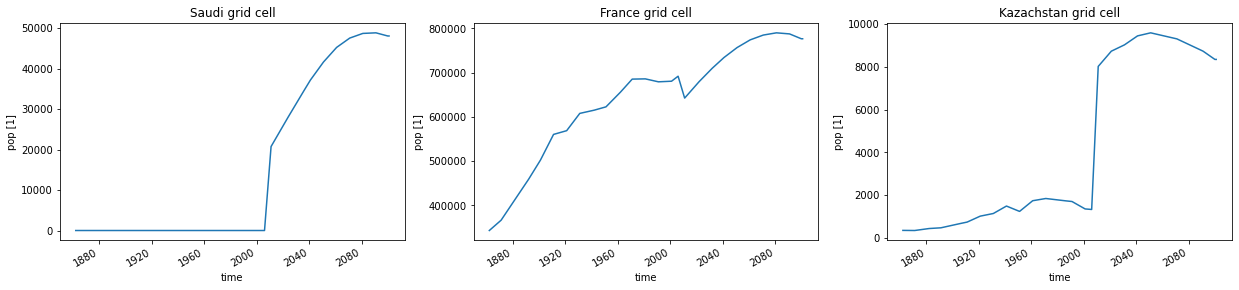

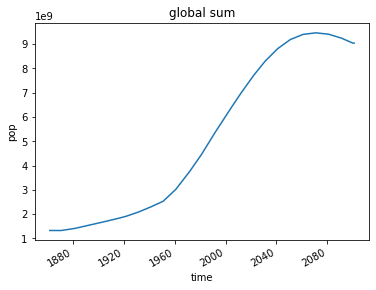

In [52]:
# define variable to plot 
da = pop

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)
plot_globalsum_timeseries(da)

## 2. Population corrected for 2005-2006 transition (See updated [correctionscript](./population_data_correction_for_consistent_spatial_distribution_of_national_population.ipynb))
Corrected population as provided in the correction script (see above)

In [37]:
#pop = xr.open_dataset('/scratch/brussel/vo/000/bvo00012/vsc10055/waterscarcity/waterscarcity_isimip/data/intermediate/population_histsoc_rcp26soc_0p5deg_annual_1861-2100.nc4')['pop']

fn_pop_hist = '/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/InputData/population/histsoc/population_histsoc_0p5deg_annual_1861-2005.nc4'
fn_pop_fut = '../corrected/corrected_population_ssp2soc_0p5deg_annual_2006-2100.nc'
pop_hist  = xr.open_dataset(fn_pop_hist, decode_times=False)
pop_fut  = xr.open_dataset(fn_pop_fut, decode_times=False).rename({'pop':'number_of_people'})

pop = pop_hist.merge(pop_fut)['number_of_people']
pop = xr.concat([pop,pop[-1,:,:]], dim='time')

pop = pop.assign_coords(time = pd.date_range(start='1860', end='2101', freq='Y'))
#pop = xr.open_dataset('/scratch/brussel/vo/000/bvo00012/vsc10055/waterscarcity/waterscarcity_isimip/data/intermediate/corrected_with_regionmask_population_histsoc_rcp26soc_0p5deg_annual_1861-2100.nc4')['pop']

### Spatial year-to-year transitions

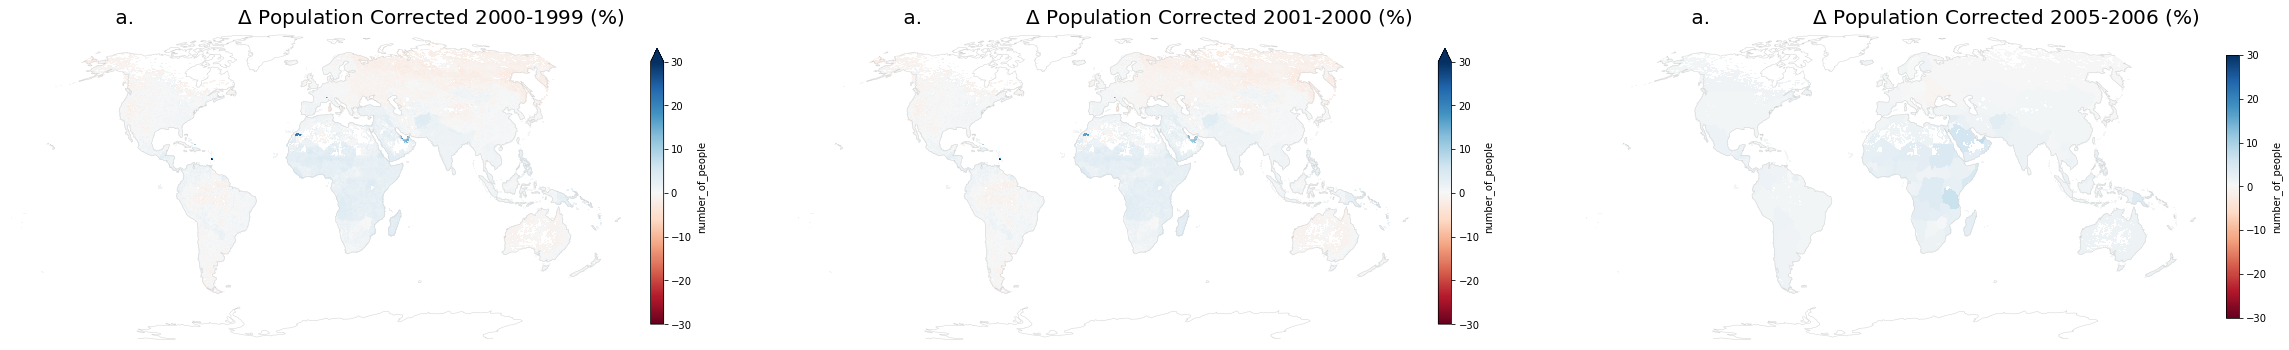

In [38]:
pop_2000 = pop.sel(time="2000-12-31").squeeze()
pop_1999 = pop.sel(time="1999-12-31").squeeze()
pop_2001 = pop.sel(time="2001-12-31").squeeze()
pop_2005 = pop.sel(time="2005-12-31").squeeze()
pop_2006 = pop.sel(time="2006-12-31").squeeze()

delta_2000_1999 = (pop_2000 - pop_1999)/pop_1999 *100
delta_2001_2000 = (pop_2001 - pop_2000)/pop_2000 *100
delta_2006_2005 = (pop_2006 - pop_2005)/pop_2005 *100

variable_name = 'Population Corrected'

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)

### Plot timeseries for individual grid cells and global mean

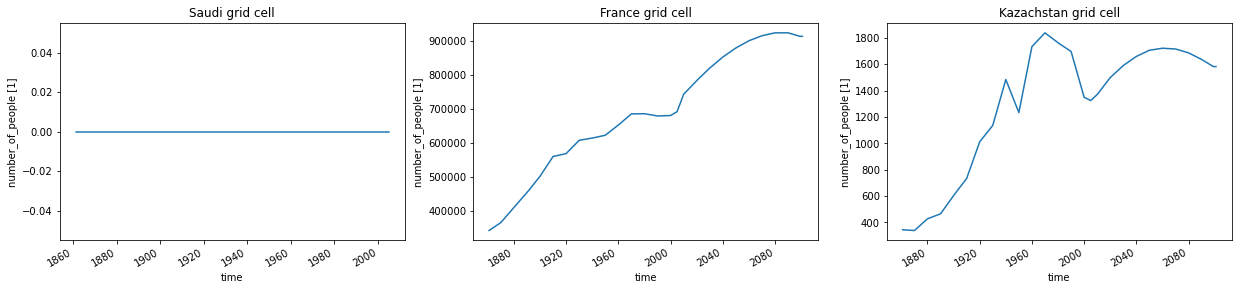

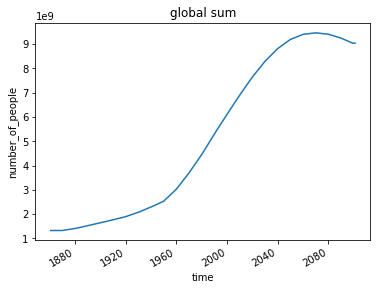

In [39]:
# define variable to plot 
da = pop

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

## 3. GDP

GDP is used as input for the hydrological models (and not in postprocessing)

In [216]:
gdp_hist =  xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/InputData/gdp/histsoc/gdp_histsoc_0p5deg_annual_1861-2005.nc4')
gdp_fut = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/InputData/gdp/rcp26soc/gdp_rcp26soc_0p5deg_annual_2006-2099.nc4')
gdp = xr.concat([gdp_hist,gdp_fut],dim='time')['gdp']

gdp_with_corrected_countries_time_series_1861_2099

### Spatial year-to-year transitions

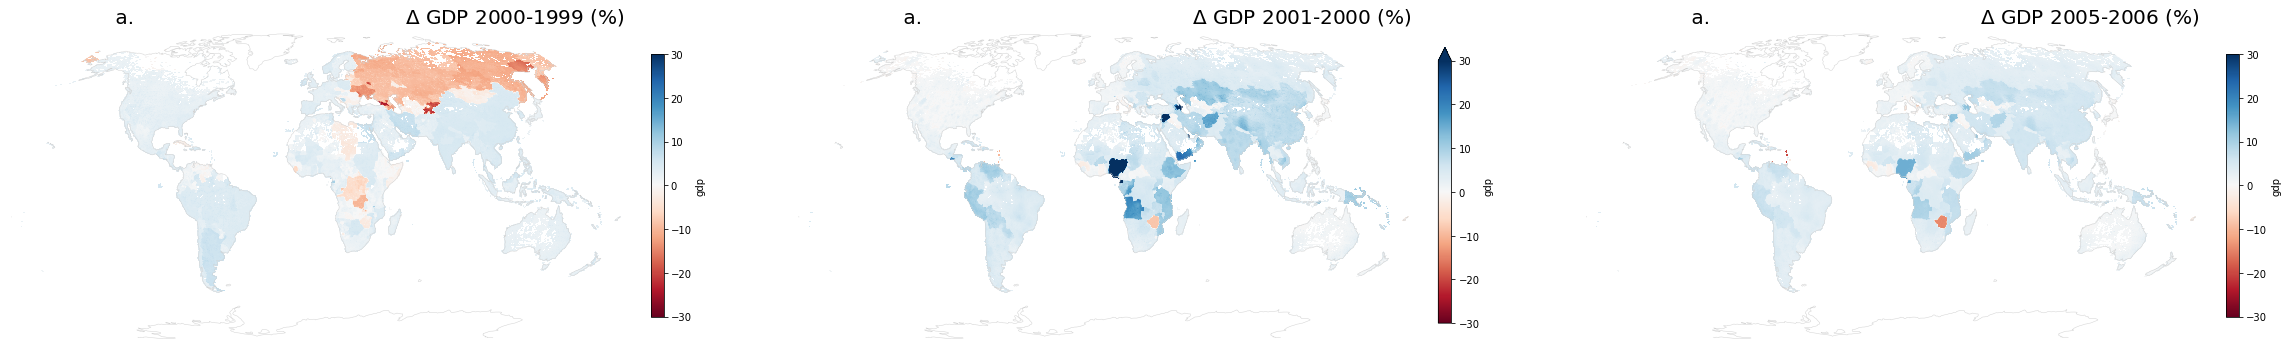

In [217]:
variable_name = 'GDP'
gdp_2000 = gdp.sel(time="2000-01-01").squeeze()
gdp_1999 = gdp.sel(time="1999-01-01").squeeze()
gdp_2001 = gdp.sel(time="2001-01-01").squeeze()
gdp_2005 = gdp.sel(time="2005-01-01").squeeze()
gdp_2006 = gdp.sel(time="2006-01-01").squeeze()

delta_2000_1999 = (gdp_2000 - gdp_1999)/gdp_1999 *100
delta_2001_2000 = (gdp_2001 - gdp_2000)/gdp_2000 *100
delta_2006_2005 = (gdp_2006 - gdp_2005)/gdp_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005,variable_name)


### Plot timeseries for individual grid cells and global mean

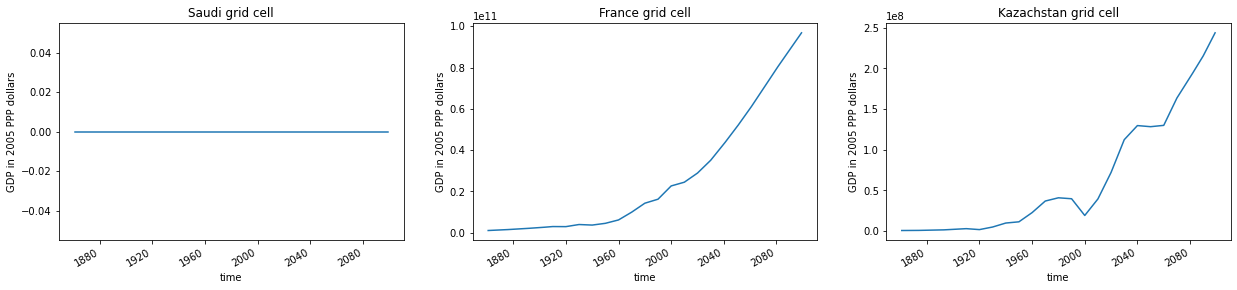

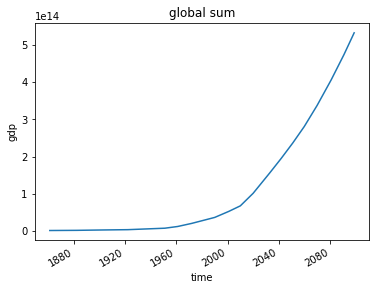

In [218]:
# define variable to plot 
da = gdp

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

## 3.2 GDP corrected (using same correction as pop data)

GDP is used as input for the hydrological models (and not in postprocessing)

In [47]:
gdp = xr.open_dataset('../corrected/gdp_with_corrected_countries_time_series_1861_2099.nc')['gdp']


### Spatial year-to-year transitions

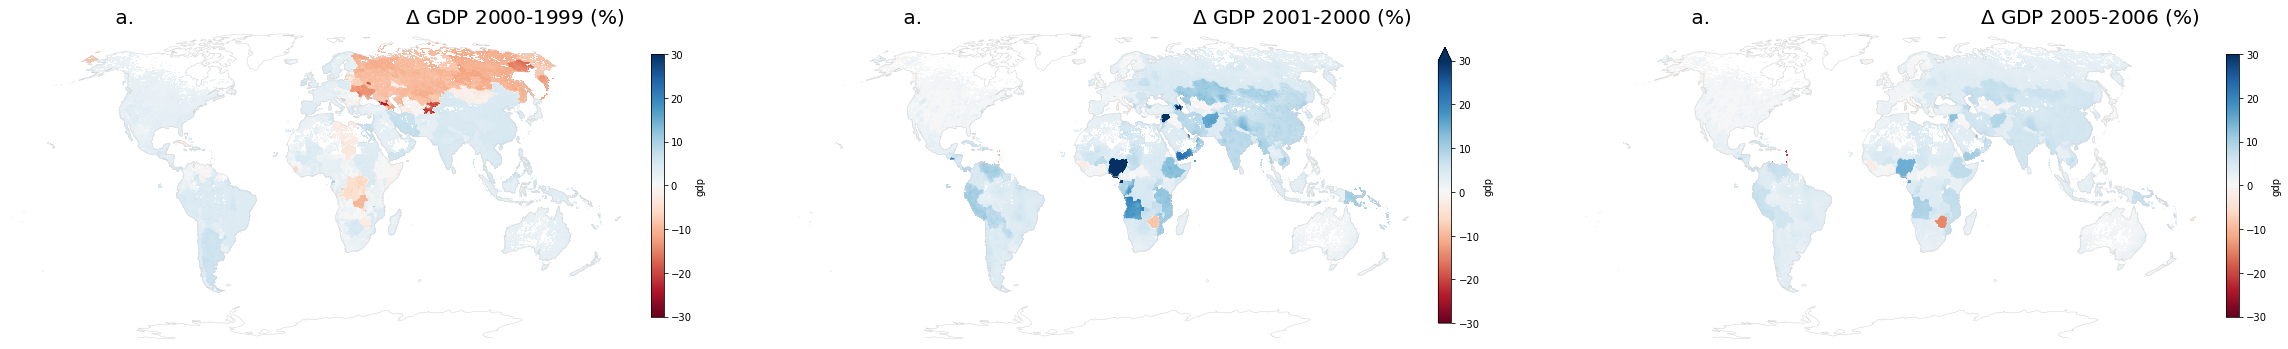

In [48]:
variable_name = 'GDP'
gdp_2000 = gdp.sel(time="2000-01-01").squeeze()
gdp_1999 = gdp.sel(time="1999-01-01").squeeze()
gdp_2001 = gdp.sel(time="2001-01-01").squeeze()
gdp_2005 = gdp.sel(time="2005-01-01").squeeze()
gdp_2006 = gdp.sel(time="2006-01-01").squeeze()

delta_2000_1999 = (gdp_2000 - gdp_1999)/gdp_1999 *100
delta_2001_2000 = (gdp_2001 - gdp_2000)/gdp_2000 *100
delta_2006_2005 = (gdp_2006 - gdp_2005)/gdp_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005,variable_name)


### Plot timeseries for individual grid cells and global mean

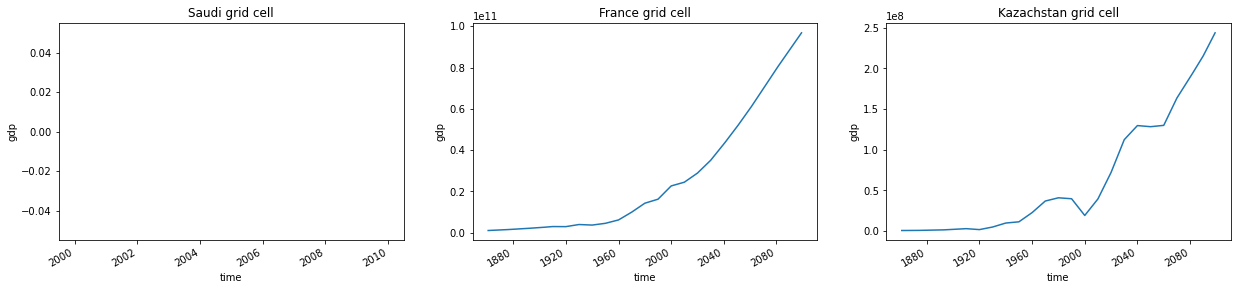

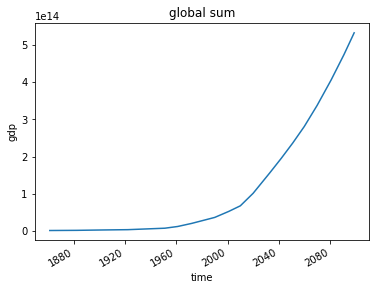

In [49]:
# define variable to plot 
da = gdp

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

## 4. Domestic and industrial water demand (ISIMIP2a input data)
(ISIMIP 2b inputdata: multi-model mean of WaterGAP, H08 and PCR-GLOWB): used for LPJmL and MATSIRO as input

In [16]:
# Load postprocessed water scarcity files (only postprocessing is merging and giving right time dimension)

waterscarcity_dir = '/scratch/brussel/vo/000/bvo00012/vsc10055/waterscarcity/waterscarcity_isimip/'

domww = xr.open_dataset(waterscarcity_dir+'/data/2b/intermediate/lpjml/domww.nc')['domww']
indww = xr.open_dataset(waterscarcity_dir+'/data/2b/intermediate/lpjml/indww.nc')['indww']

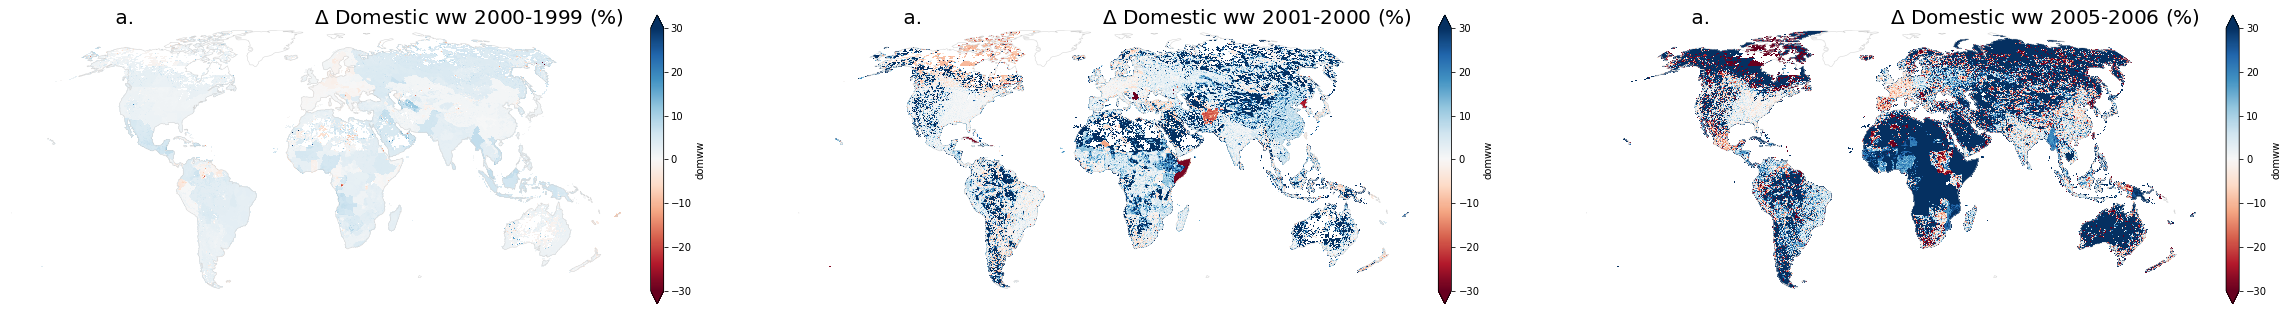

In [17]:
variable_name = 'Domestic ww'
ww = domww

ww_2000 = ww.sel(time="2000-07-15").squeeze()
ww_1999 = ww.sel(time="1999-07-15").squeeze()
ww_2001 = ww.sel(time="2001-07-15").squeeze()
ww_2005 = ww.sel(time="2005-07-15").squeeze()
ww_2006 = ww.sel(time="2006-07-15").squeeze()


delta_2000_1999 = (ww_2000 - ww_1999)/ww_1999 *100
delta_2001_2000 = (ww_2001 - ww_2000)/ww_2000 *100
delta_2006_2005 = (ww_2006 - ww_2005)/ww_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)


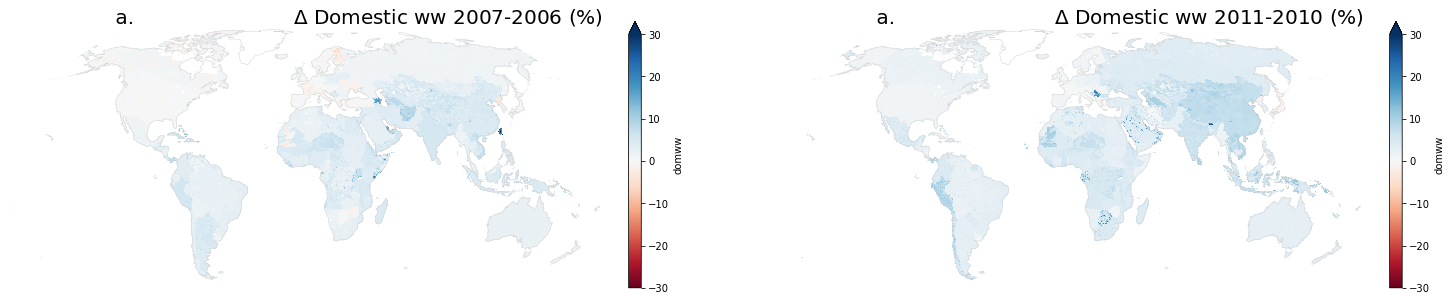

In [18]:
ww_2007 = ww.sel(time="2007-07-15").squeeze()
ww_2010 = ww.sel(time="2010-07-15").squeeze()
ww_2011 = ww.sel(time="2011-07-15").squeeze()

delta_2011_2010 = (ww_2011 - ww_2010)/ww_2010 *100
delta_2007_2006 = (ww_2007 - ww_2006)/ww_2006 *100


map_proj = ccrs.Robinson(central_longitude=0, globe=None)

fig, axes = plt.subplots(1,2,figsize=(25,20), subplot_kw={'projection':map_proj})
axes.flatten()

ax = axes[0]
ax.axis('off')
ax.coastlines(color='lightgray',linewidth=0.5)
delta_2007_2006.plot(ax=ax, cbar_kwargs={'fraction': 0.02, 'pad': 0.04}, cmap='RdBu', vmin=-30, vmax=30, transform=ccrs.PlateCarree())
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('');
ax.set_title('$\Delta$ ' +variable_name+' 2007-2006 (%)', loc='right', fontsize=20);
ax.set_title('                 a.', loc='left', fontsize=20);


ax = axes[1]
ax.axis('off')
ax.coastlines(color='lightgray',linewidth=0.5)
delta_2011_2010.plot(ax=ax, cbar_kwargs={'fraction': 0.02, 'pad': 0.04}, cmap='RdBu', vmin=-30, vmax=30, transform=ccrs.PlateCarree())
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('');
ax.set_title('$\Delta$ ' +variable_name+' 2011-2010 (%)', loc='right', fontsize=20);
ax.set_title('                 a.', loc='left', fontsize=20);



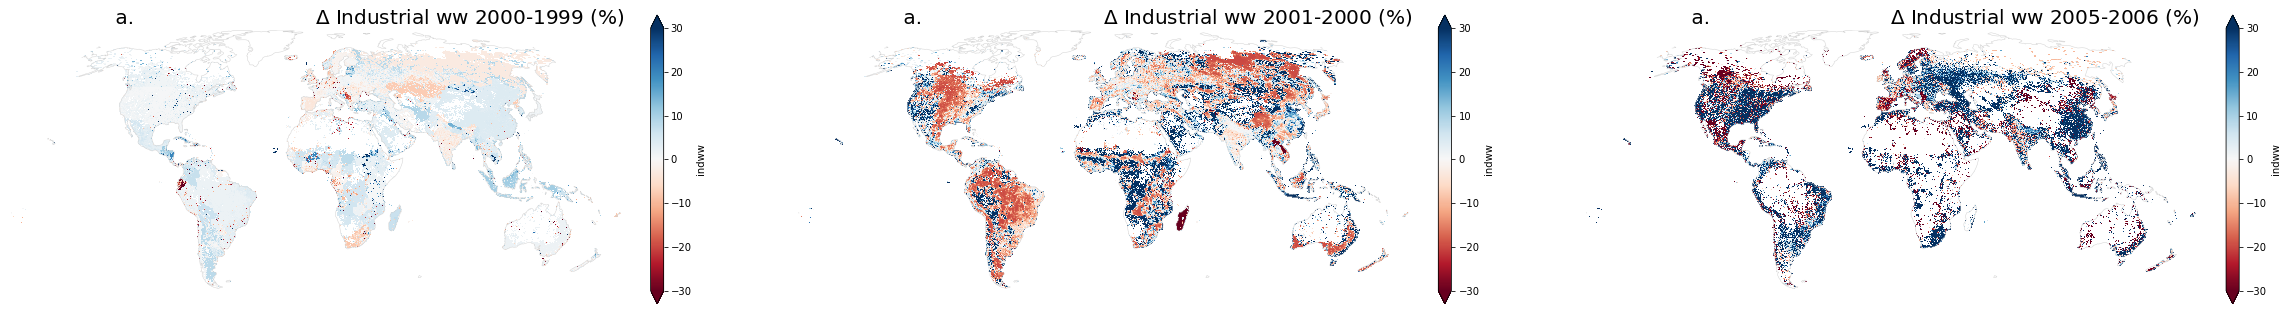

In [19]:
variable_name = 'Industrial ww'
ww = indww

ww_2000 = ww.sel(time="2000-07-15").squeeze()
ww_1999 = ww.sel(time="1999-07-15").squeeze()
ww_2001 = ww.sel(time="2001-07-15").squeeze()
ww_2005 = ww.sel(time="2005-07-15").squeeze()
ww_2006 = ww.sel(time="2006-07-15").squeeze()

delta_2000_1999 = (ww_2000 - ww_1999)/ww_1999 *100
delta_2001_2000 = (ww_2001 - ww_2000)/ww_2000 *100
delta_2006_2005 = (ww_2006 - ww_2005)/ww_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)


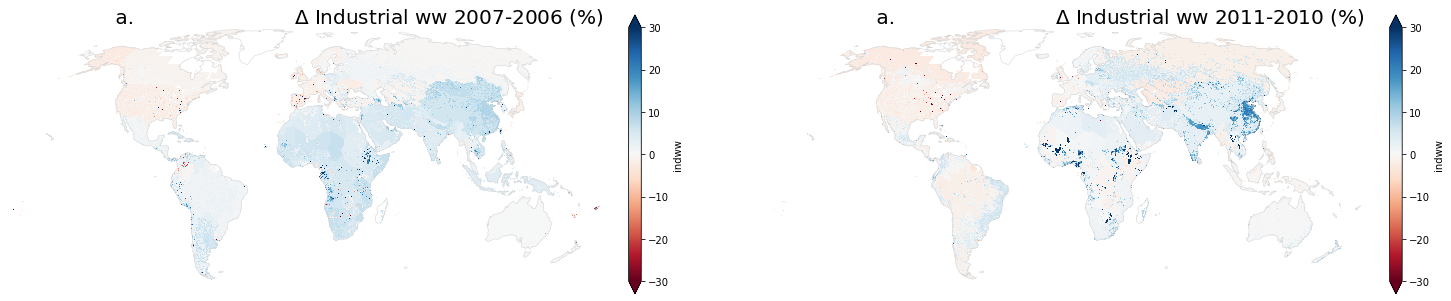

In [20]:
ww_2007 = ww.sel(time="2007-07-15").squeeze()
ww_2010 = ww.sel(time="2010-07-15").squeeze()
ww_2011 = ww.sel(time="2011-07-15").squeeze()

delta_2011_2010 = (ww_2011 - ww_2010)/ww_2010 *100
delta_2007_2006 = (ww_2007 - ww_2006)/ww_2006 *100


map_proj = ccrs.Robinson(central_longitude=0, globe=None)

fig, axes = plt.subplots(1,2,figsize=(25,20), subplot_kw={'projection':map_proj})
axes.flatten()

ax = axes[0]
ax.axis('off')
ax.coastlines(color='lightgray',linewidth=0.5)
delta_2007_2006.plot(ax=ax, cbar_kwargs={'fraction': 0.02, 'pad': 0.04}, cmap='RdBu', vmin=-30, vmax=30, transform=ccrs.PlateCarree())
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('');
ax.set_title('$\Delta$ ' +variable_name+' 2007-2006 (%)', loc='right', fontsize=20);
ax.set_title('                 a.', loc='left', fontsize=20);


ax = axes[1]
ax.axis('off')
ax.coastlines(color='lightgray',linewidth=0.5)
delta_2011_2010.plot(ax=ax, cbar_kwargs={'fraction': 0.02, 'pad': 0.04}, cmap='RdBu', vmin=-30, vmax=30, transform=ccrs.PlateCarree())
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('');
ax.set_title('$\Delta$ ' +variable_name+' 2011-2010 (%)', loc='right', fontsize=20);
ax.set_title('                 a.', loc='left', fontsize=20);



### Plot timeseries for individual grid cells and global mean

DOMESTIC


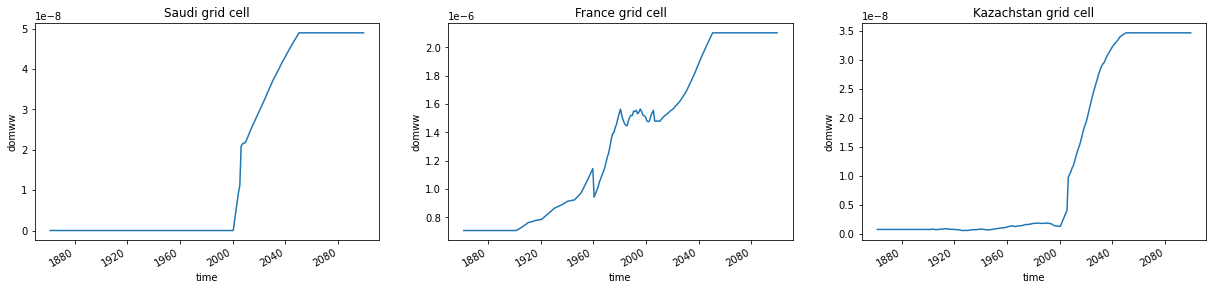

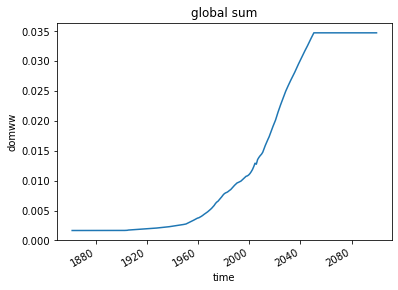

In [222]:
# define variable to plot 
da = domww

print('DOMESTIC')

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

INDUSTRIAL


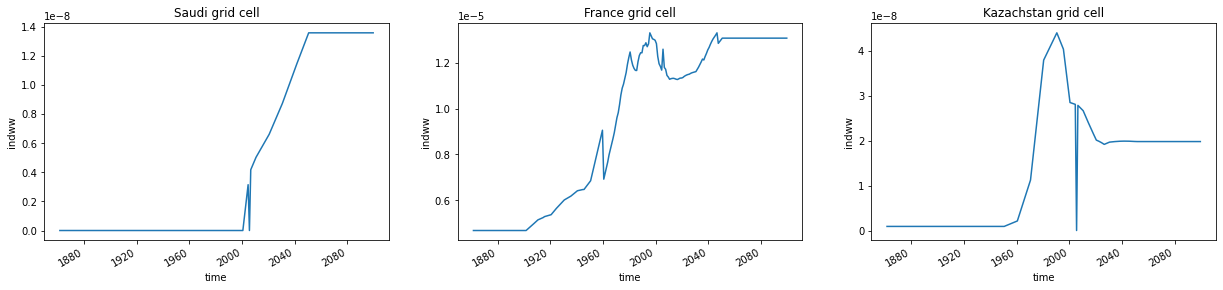

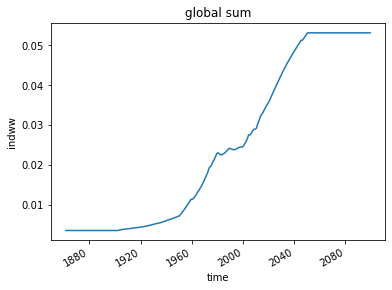

In [223]:
# define variable to plot 
da = indww

print('INDUSTRIAL')

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

## 5. Domestic and industrial water demand for H08 (here for HadGEM)
as modeled output (raw, not postprocessed)

In [224]:
# load historical and future water demands from raw simulations

domww_hist = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/H08/hadgem2-es/historical/h08_hadgem2-es_ewembi_historical_histsoc_co2_adomww_global_annual_1861_2005.nc4', decode_times=False)['adomww']
indww_hist = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/H08/hadgem2-es/historical/h08_hadgem2-es_ewembi_historical_histsoc_co2_amanww_global_annual_1861_2005.nc4', decode_times=False)['amanww']

domww_fut = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/H08/hadgem2-es/future/h08_hadgem2-es_ewembi_rcp60_rcp60soc_co2_adomww_global_annual_2006_2099.nc4', decode_times=False)['adomww']
indww_fut = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/H08/hadgem2-es/future/h08_hadgem2-es_ewembi_rcp60_rcp60soc_co2_amanww_global_annual_2006_2099.nc4', decode_times=False)['amanww']

In [228]:
# assign right timing for comparison purposes

domww_hist = domww_hist.assign_coords(time = pd.date_range(start='1861', end='2006', freq='Y'))
domww_fut = domww_fut.assign_coords(time = pd.date_range(start='2006', end='2100', freq='Y'))

indww_hist = indww_hist.assign_coords(time = pd.date_range(start='1861', end='2006', freq='Y'))
indww_fut = indww_fut.assign_coords(time = pd.date_range(start='2006', end='2100', freq='Y'))

domww = xr.concat([domww_hist,domww_fut],dim='time')
indww = xr.concat([indww_hist,indww_fut],dim='time')

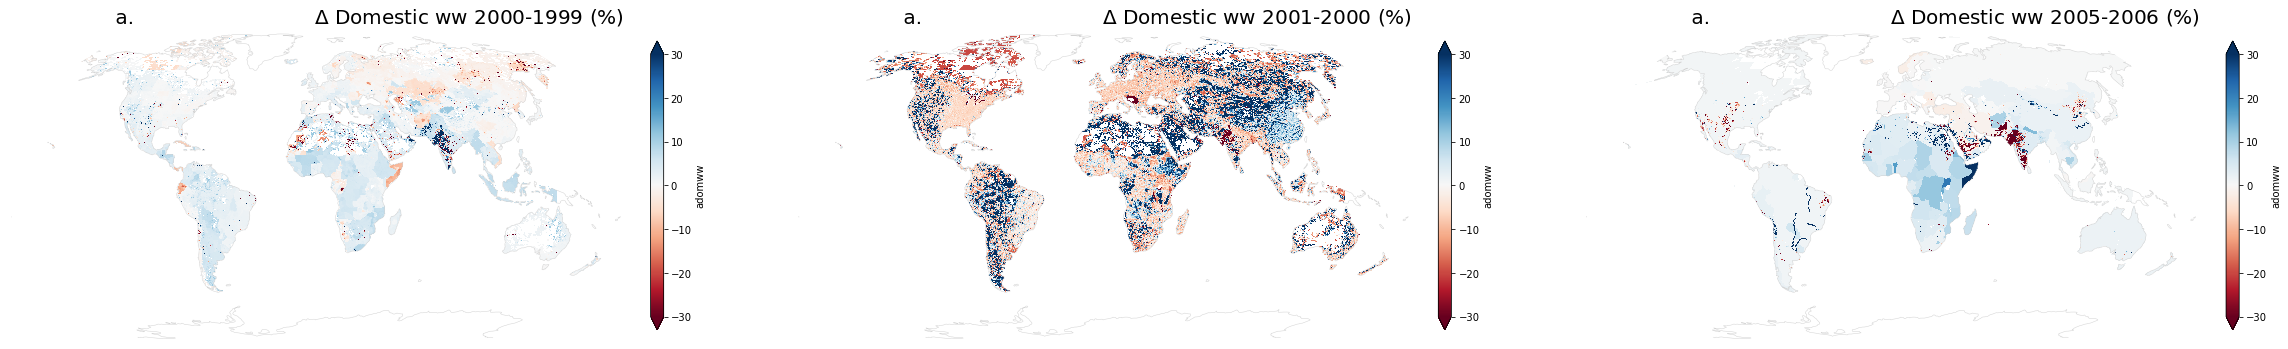

In [231]:
variable_name = 'Domestic ww'
ww = domww

ww_2000 = ww.sel(time="2000-12-31").squeeze()
ww_1999 = ww.sel(time="1999-12-31").squeeze()
ww_2001 = ww.sel(time="2001-12-31").squeeze()
ww_2005 = ww.sel(time="2005-12-31").squeeze()
ww_2006 = ww.sel(time="2006-12-31").squeeze()

delta_2000_1999 = (ww_2000 - ww_1999)/ww_1999 *100
delta_2001_2000 = (ww_2001 - ww_2000)/ww_2000 *100
delta_2006_2005 = (ww_2006 - ww_2005)/ww_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)


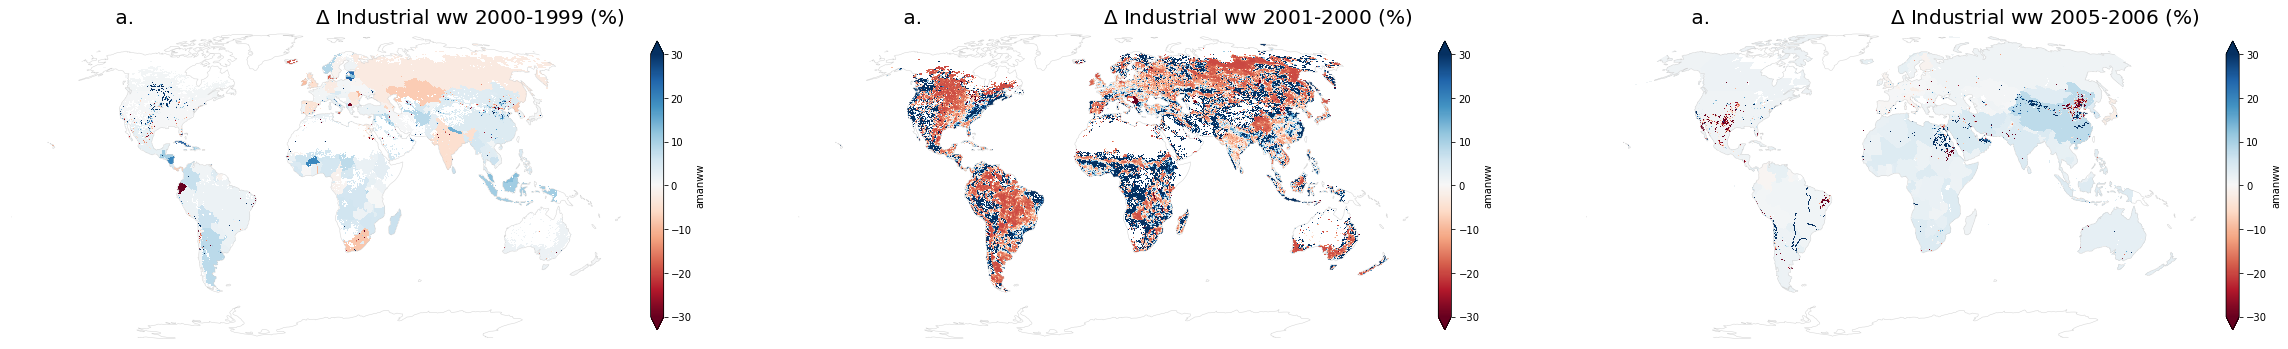

In [232]:
variable_name = 'Industrial ww'
ww = indww


ww_2000 = ww.sel(time="2000-12-31").squeeze()
ww_1999 = ww.sel(time="1999-12-31").squeeze()
ww_2001 = ww.sel(time="2001-12-31").squeeze()
ww_2005 = ww.sel(time="2005-12-31").squeeze()
ww_2006 = ww.sel(time="2006-12-31").squeeze()

delta_2000_1999 = (ww_2000 - ww_1999)/ww_1999 *100
delta_2001_2000 = (ww_2001 - ww_2000)/ww_2000 *100
delta_2006_2005 = (ww_2006 - ww_2005)/ww_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)


### Plot timeseries for individual grid cells and global mean

DOMESTIC


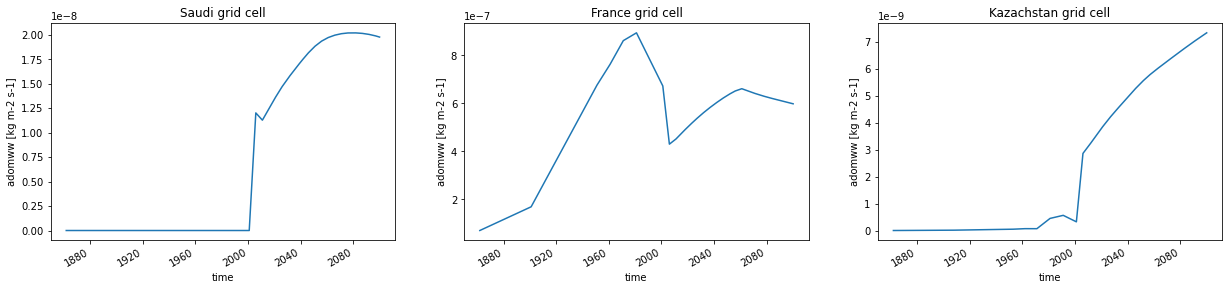

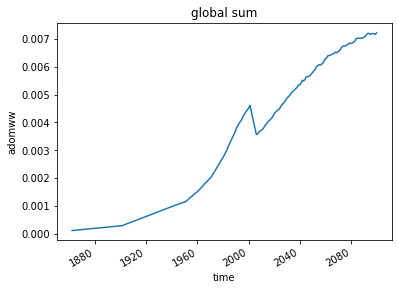

In [233]:
# define variable to plot 
da = domww

print('DOMESTIC')

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

INDUSTRIAL


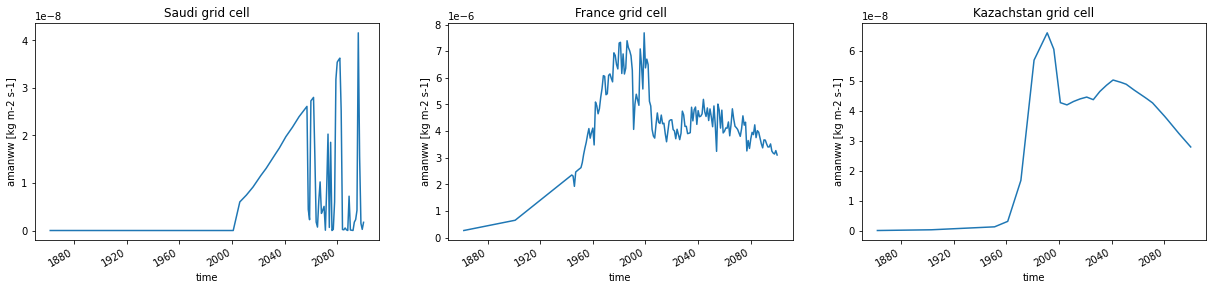

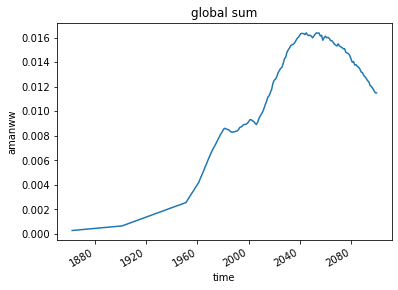

In [234]:
# define variable to plot 
da = indww

print('INDUSTRIAL')

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

## 6. Domestic and industrial water demand for CWatM (here for HadGEM)
as modeled output (raw, not postprocessed)

In [236]:
domww_hist = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/CWatM/hadgem2-es/historical/cwatm_hadgem2-es_ewembi_historical_histsoc_co2_adomuse_global_annual_1861_2005.nc4', decode_times=False)['adomuse']
indww_hist = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/CWatM/hadgem2-es/historical/cwatm_hadgem2-es_ewembi_historical_histsoc_co2_ainduse_global_annual_1861_2005.nc4', decode_times=False)['ainduse']

domww_fut = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/CWatM/hadgem2-es/future/cwatm_hadgem2-es_ewembi_rcp60_rcp60soc_co2_adomuse_global_annual_2006_2099.nc4', decode_times=False)['adomuse']
indww_fut = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/CWatM/hadgem2-es/future/cwatm_hadgem2-es_ewembi_rcp60_rcp60soc_co2_ainduse_global_annual_2006_2099.nc4', decode_times=False)['ainduse']

In [237]:
# assign right timing for comparison purposes

domww_hist = domww_hist.assign_coords(time = pd.date_range(start='1861', end='2006', freq='Y'))
domww_fut = domww_fut.assign_coords(time = pd.date_range(start='2006', end='2100', freq='Y'))

indww_hist = indww_hist.assign_coords(time = pd.date_range(start='1861', end='2006', freq='Y'))
indww_fut = indww_fut.assign_coords(time = pd.date_range(start='2006', end='2100', freq='Y'))

domww = xr.concat([domww_hist,domww_fut],dim='time')
indww = xr.concat([indww_hist,indww_fut],dim='time')

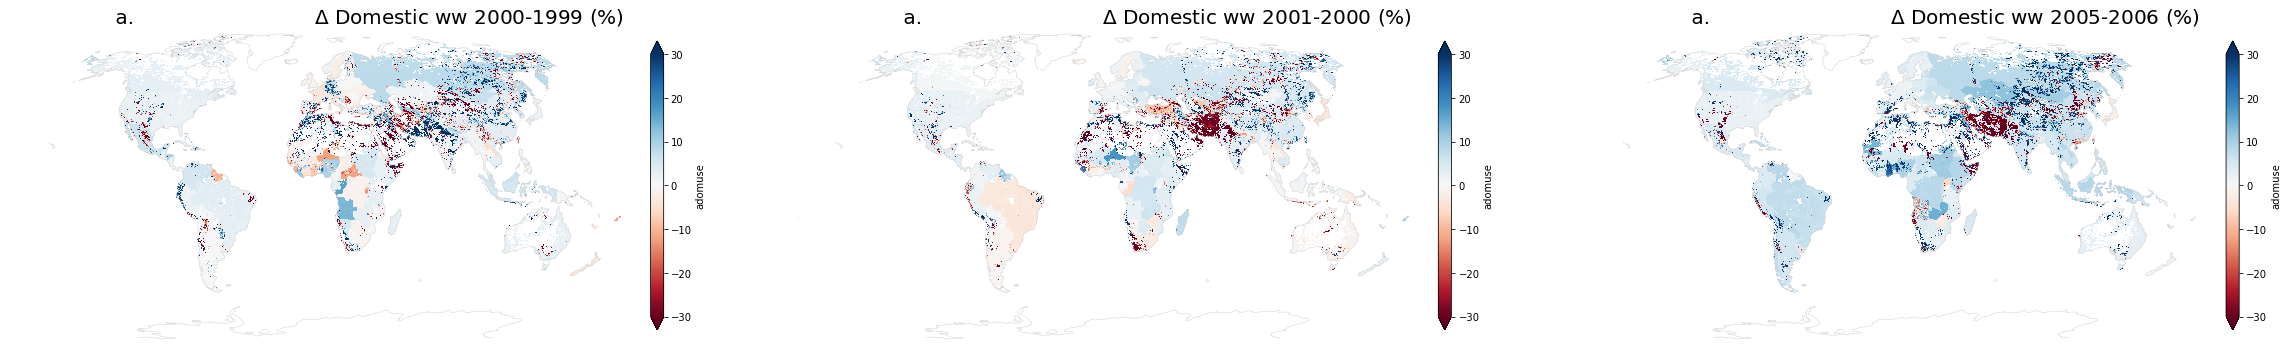

In [238]:
variable_name = 'Domestic ww'
ww = domww

ww_2000 = ww.sel(time="2000-12-31").squeeze()
ww_1999 = ww.sel(time="1999-12-31").squeeze()
ww_2001 = ww.sel(time="2001-12-31").squeeze()
ww_2005 = ww.sel(time="2005-12-31").squeeze()
ww_2006 = ww.sel(time="2006-12-31").squeeze()

delta_2000_1999 = (ww_2000 - ww_1999)/ww_1999 *100
delta_2001_2000 = (ww_2001 - ww_2000)/ww_2000 *100
delta_2006_2005 = (ww_2006 - ww_2005)/ww_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)


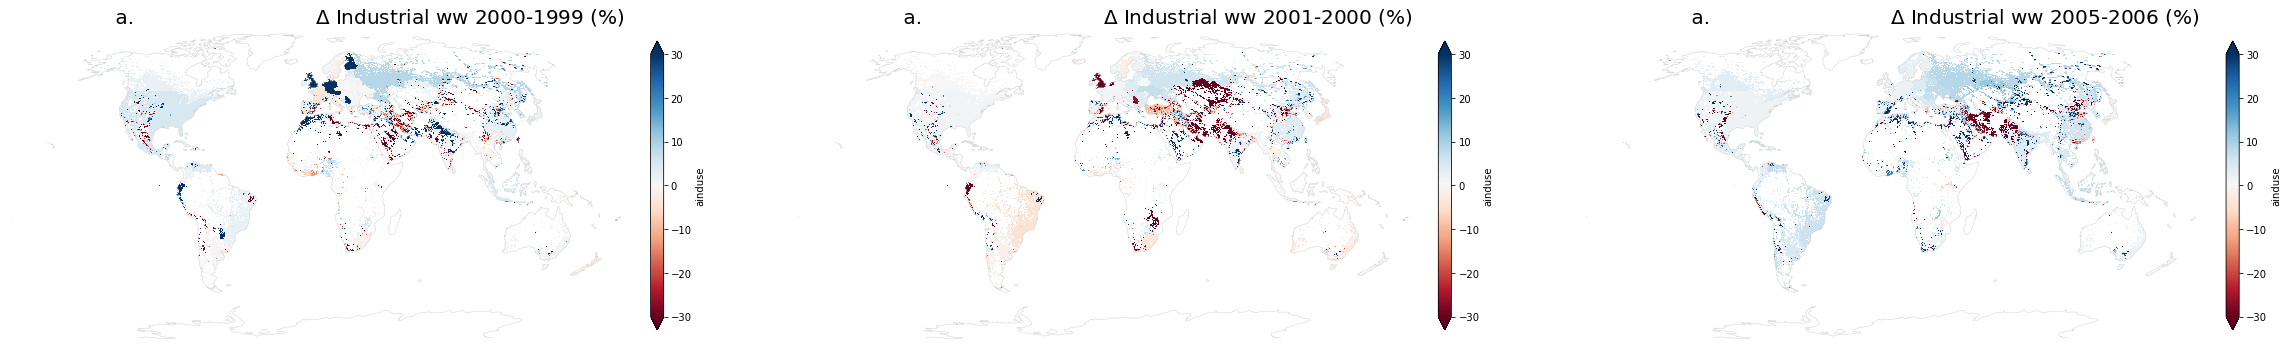

In [239]:
variable_name = 'Industrial ww'
ww = indww


ww_2000 = ww.sel(time="2000-12-31").squeeze()
ww_1999 = ww.sel(time="1999-12-31").squeeze()
ww_2001 = ww.sel(time="2001-12-31").squeeze()
ww_2005 = ww.sel(time="2005-12-31").squeeze()
ww_2006 = ww.sel(time="2006-12-31").squeeze()

delta_2000_1999 = (ww_2000 - ww_1999)/ww_1999 *100
delta_2001_2000 = (ww_2001 - ww_2000)/ww_2000 *100
delta_2006_2005 = (ww_2006 - ww_2005)/ww_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)


### Plot timeseries for individual grid cells and global mean

DOMESTIC


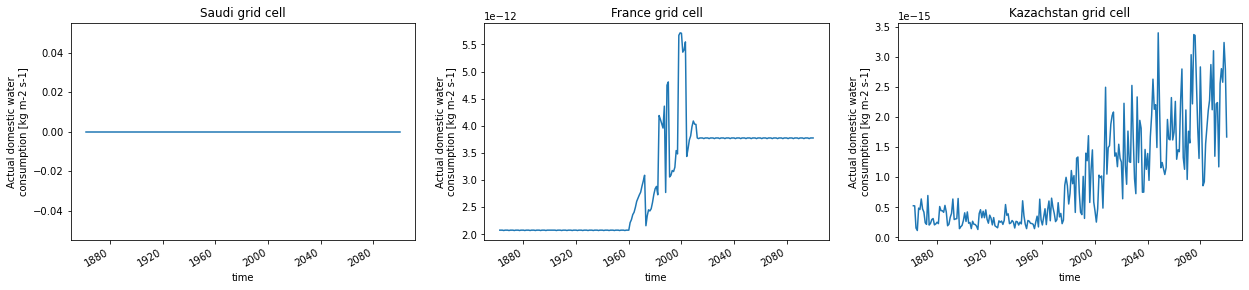

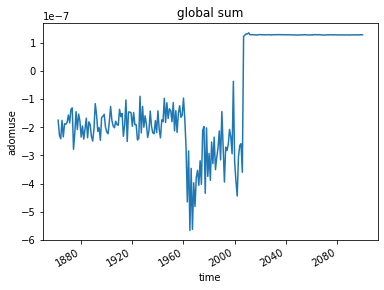

In [240]:
# define variable to plot 
da = domww

print('DOMESTIC')

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

INDUSTRIAL


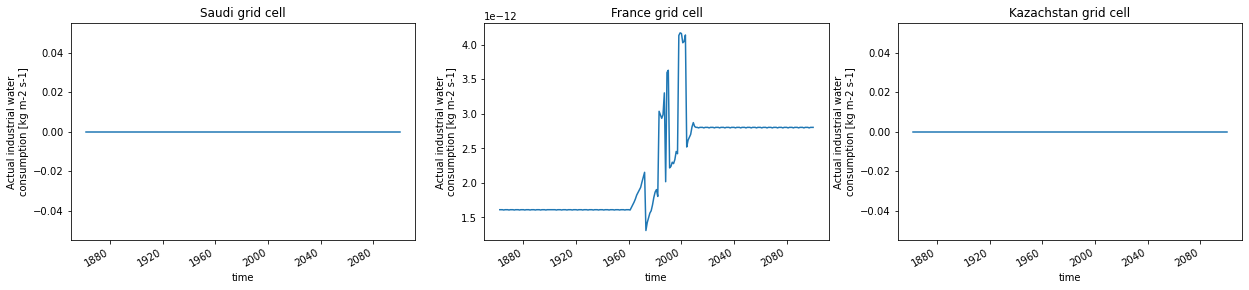

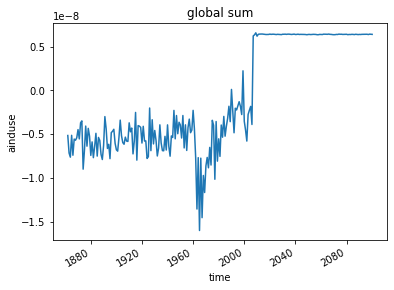

In [241]:
# define variable to plot 
da = indww

print('INDUSTRIAL')

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)